In [1]:
# Titanic - Survival analys

1 - Define the problem / Question
  - Survival Analysis

2 - Data Collection
  - Survey / Expert Advice /

3 - Data Cleaning
  - Handle missing values
  - Identify and remove the duplicates
  - Handle the outliers
  - Transfer the data into suitable format

4 - EDA - Exploratory Data Analysis
  - Qestioning / Interpretation
  - Feature Engg. ( New columns create / column Delete )
  - Visualizations ( All graphs that needed)

5 - Analyze the insights & Report(excel/powerbi dashboards)









In [2]:
# import all libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# load the data from seaborn library

titanic = sns.load_dataset("titanic")

In [4]:
# check the data is loaded or not
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# lets check tha all data information

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Insights

- we have total 891 passenger data.
- where two features are in boolian, two feature are in categorical data, two feature are in float data, four feature are in int, also we have five object features
- as we seen we have 891 passengers but given data features contain some missing values also
-so lets check the exact no.

In [6]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Insights

- we have missing data like
- age have 177 missing values - should be imputed
on the basis of pclass, sex replace by mean or median
- embarked/embarked_town have 2 missing values. can be imputed with mode
deck have massive missing values better to drop this columns

In [7]:
#impute the age missing values based on pclass and sex

In [8]:
titanic["age"] = titanic.groupby(["pclass", "sex"])["age"].transform(lambda x : x.fillna(x.median()))

In [9]:
titanic.groupby(["pclass", "sex"])["age"].mean()

pclass  sex   
1       female    34.648936
        male      41.060820
2       female    28.703947
        male      30.678981
3       female    21.677083
        male      26.099193
Name: age, dtype: float64

In [10]:
titanic['age'].median()

26.0

In [11]:
#titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [12]:
titanic['age'].isnull().sum()

np.int64(0)

In [13]:
#replace the embarked with mode

In [14]:
titanic['embarked'].mode()[0]

'S'

In [15]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace =True)

/tmp/ipython-input-15-3236628591.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace =True)


In [16]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [17]:
#lets drop the unwanted columns - Feature Engg.

In [18]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [19]:
titanic.drop(columns= ['who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone' ] , inplace =True)

In [20]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0


In [21]:
# it may contain the duplicated record

In [22]:
titanic.duplicated().sum()

np.int64(118)

In [23]:
titanic.drop_duplicates(inplace=True)

In [24]:
titanic.duplicated().sum()

np.int64(0)

In [25]:
titanic.shape

(773, 9)

In [26]:
# so we have 773 passenger data

In [27]:
# so lets describe

In [28]:
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
count,773.000000,773.000000,773,773.000000,773.000000,773.000000,773.000000,773,773
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third
freq,NaN,NaN,482,NaN,NaN,NaN,NaN,562,400
mean,0.415265,2.247089,NaN,29.558111,0.529107,0.421734,35.003315,NaN,NaN
std,0.493087,0.853070,NaN,13.988257,0.991280,0.841380,52.443053,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,1.000000,NaN,21.000000,0.000000,0.000000,8.050000,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,16.100000,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,34.375000,NaN,NaN


In [29]:
# EDA - Exploratoary Data Analysis

In [30]:
#qu1 -  What is the overall distribution of passengers across different classes
 #(Pclass)?

In [31]:
titanic['pclass'].unique()

array([3, 1, 2])

In [32]:
pclass_count = titanic['pclass'].value_counts().sort_index()

In [33]:
pclass_count

,count
pclass,
1,209
2,164
3,400


In [34]:
pclass_count.index

Index([1, 2, 3], dtype='int64', name='pclass')

In [35]:
pclass_count.values

array([209, 164, 400])

/tmp/ipython-input-36-3771654115.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= pclass_count.index ,


Text(0.5, 1.0, 'Distribution of passenger across pclass')

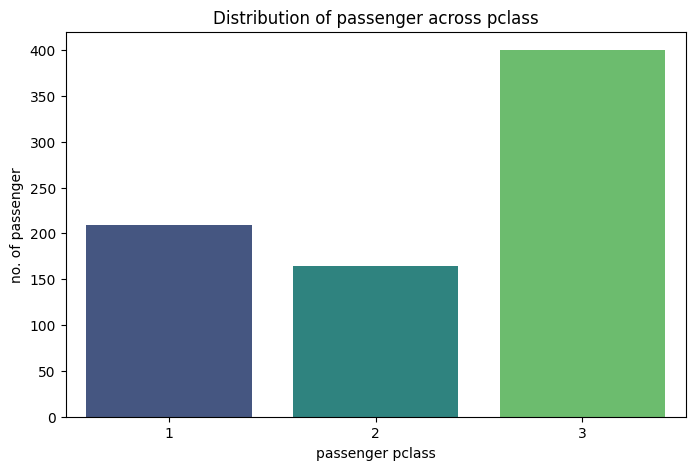

In [36]:
plt.figure(figsize=(8,5))
sns.barplot( x= pclass_count.index ,
            y = pclass_count.values , palette="viridis")
plt.xlabel("passenger pclass")
plt.ylabel("no. of passenger")
plt.title("Distribution of passenger across pclass")

In [37]:
# insights - majority of the passenger traveled in pclass 3 ,
# idicating it was the most affordable and populer class.

#pclass1 and 2 had moderate number of passenger,
# suggesting fewer people could afford luxury travel.

In [38]:
#q2 - how the age is distributed

Text(0.5, 1.0, 'Distribution of age')

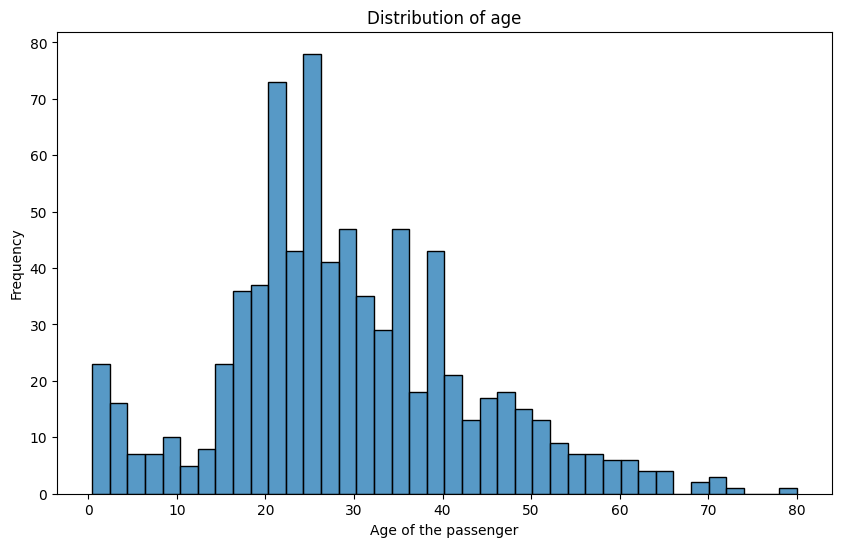

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(data =titanic , x ='age', bins = 40)
plt.xlabel("Age of the passenger")
plt.ylabel("Frequency")
plt.title("Distribution of age")

In [40]:
#insights
# the peak age group is 20 -30 year - indicating many young passenger traveled
# there are fewer childrens age < 10 and elderly age > 60 on board
# the age distribution has a tail on the right side
#indicating some passenger were much older (may be outlier)
#not to be board


In [41]:
#3 - distrubtion based on gender

In [42]:
titanic['sex'].unique()

array(['male', 'female'], dtype=object)

In [43]:
gender_count = titanic['sex'].value_counts()

In [44]:
gender_count

,count
sex,
male,482
female,291


/tmp/ipython-input-45-3639290018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= gender_count.index ,


Text(0.5, 1.0, 'Distribution of passenger across gender')

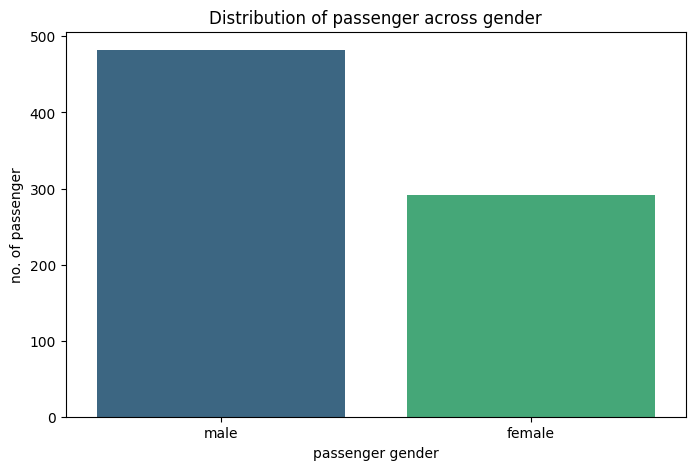

In [45]:
plt.figure(figsize=(8,5))
sns.barplot( x= gender_count.index ,
            y = gender_count.values , palette="viridis")
plt.xlabel("passenger gender")
plt.ylabel("no. of passenger")
plt.title("Distribution of passenger across gender")

In [46]:
# the dataset shows more ale passenger than female
# since the titanic was a mix emigrats, workers , healthy workers
# men might travels more for work opportunity

In [47]:
#qu 4 - embarked from each port - homework
# unique. value counts - bar graph

In [48]:
#survival rate . overall . and how dose by pclass

In [49]:
titanic['survived'].mean()*100

np.float64(41.52652005174644)

In [50]:
s_rate_pclass = titanic.groupby('pclass')['survived'].mean()*100

In [51]:
s_rate_pclass

,survived
pclass,
1,64.114833
2,50.609756
3,26.000000


/tmp/ipython-input-52-3721161742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= s_rate_pclass.index ,


Text(0.5, 1.0, 'survival rate of passenger across pclass')

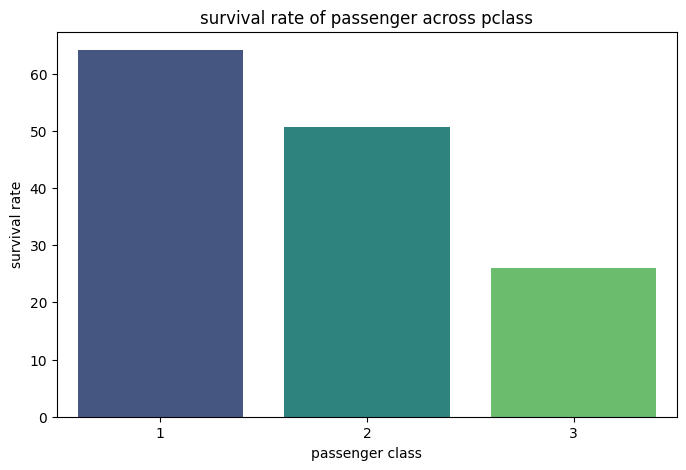

In [52]:
plt.figure(figsize=(8,5))
sns.barplot( x= s_rate_pclass.index ,
            y = s_rate_pclass.values , palette="viridis")
plt.xlabel("passenger class")
plt.ylabel("survival rate")
plt.title("survival rate of passenger across pclass")

In [53]:
#insights
# pclass1 has more survival rate may be because of
# safty precasions are near luxury classes.
# safty boats access is easy
# 3rd class passenger mostly workers, emigrants, travelrs

In [54]:
# survival rate by male female

In [55]:
s_rate_gender = titanic.groupby("sex")['survived'].mean()*100

In [56]:
s_rate_gender

,survived
sex,
female,73.883162
male,21.991701


/tmp/ipython-input-57-3212338691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= s_rate_gender.index ,


Text(0.5, 1.0, 'survival rate of passenger across gender')

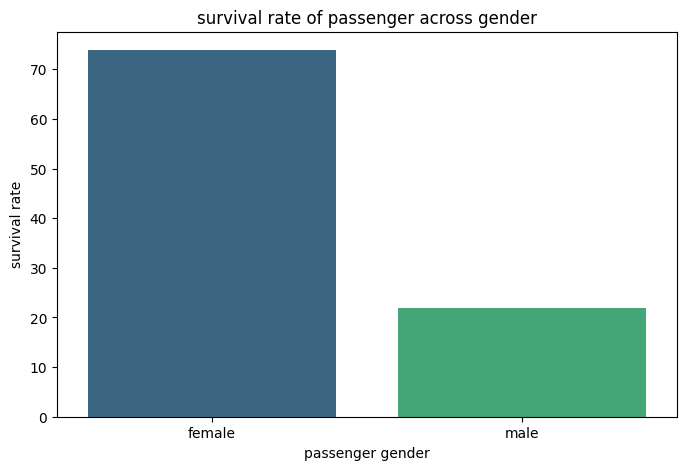

In [57]:
plt.figure(figsize=(8,5))
sns.barplot( x= s_rate_gender.index ,
            y = s_rate_gender.values , palette="viridis")
plt.xlabel("passenger gender")
plt.ylabel("survival rate")
plt.title("survival rate of passenger across gender")

In [58]:
#7- embarked
#8 - pclass
#9 sibsp
#10- parch

In [59]:
#11 - fare distribution

/tmp/ipython-input-60-3089230799.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = titanic , x='pclass' ,y='fare' , palette='Set1' )


<Axes: xlabel='pclass', ylabel='fare'>

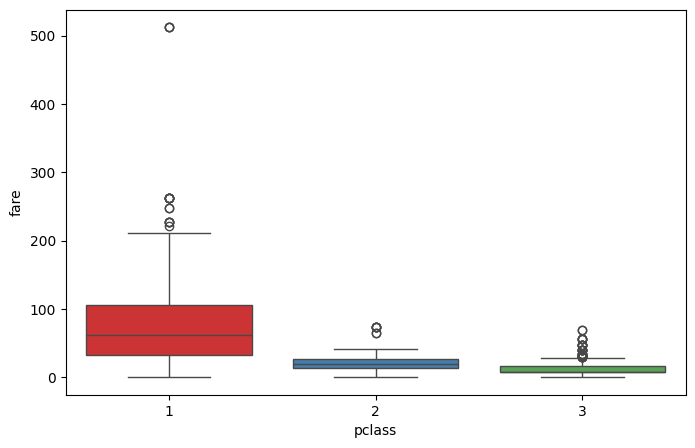

In [60]:
plt.figure(figsize= (8,5))
sns.boxplot(data = titanic , x='pclass' ,y='fare' , palette='Set1' )

/tmp/ipython-input-61-940091668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = titanic  ,y='fare' , palette='Set1' )


<Axes: ylabel='fare'>

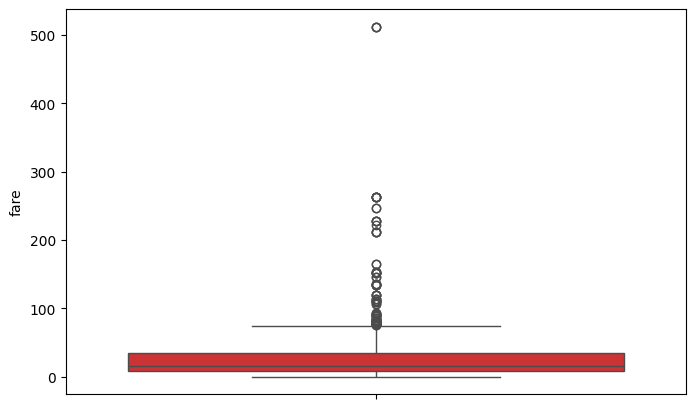

In [61]:
plt.figure(figsize= (8,5))
sns.boxplot(data = titanic  ,y='fare' , palette='Set1' )

In [62]:
q1 = titanic.groupby('pclass')['fare'].quantile(0.25)
q2 = titanic.groupby('pclass')['fare'].quantile(0.50)
q3 = titanic.groupby('pclass')['fare'].quantile(0.75)

In [63]:
IQR = q3 - q1

In [64]:
lower_bound = q1-1.5*IQR

In [65]:
upper_bound = q3 + 1.5 * IQR

In [66]:
upper_bound

,fare
pclass,
1,217.5813
2,45.5000
3,28.0875


In [67]:
# remove the fare outlier

In [68]:
upper_bound_dict = {1:217.5813 , 2:45.5000, 3:28.0875}

In [69]:
titanic['pclass'].unique()

array([3, 1, 2])

In [70]:
titan = titanic[
    ((titanic['pclass'] == 1) & (titanic['fare'] < upper_bound_dict[1])) |
    ((titanic['pclass'] == 2) & (titanic['fare'] < upper_bound_dict[2])) |
    ((titanic['pclass'] == 3) & (titanic['fare'] < upper_bound_dict[3]))
]

/tmp/ipython-input-71-3844237659.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = titan , x='pclass', y='fare' , palette='Set1' )


<Axes: xlabel='pclass', ylabel='fare'>

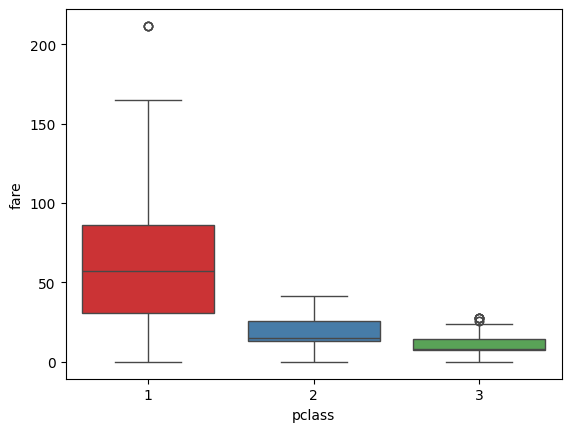

In [71]:
sns.boxplot(data = titan , x='pclass', y='fare' , palette='Set1' )

<Axes: xlabel='fare', ylabel='Count'>

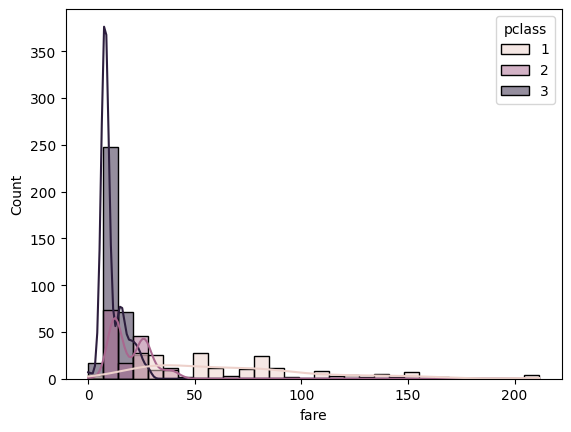

In [72]:
sns.histplot(data = titan , x='fare',hue='pclass', bins= 30 , kde = True)

In [73]:
#12 - relationship between age and survival rate -

In [74]:
titanic['age'].unique()

array([22.  , 38.  , 26.  , 35.  , 25.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 30.  , 31.  , 21.5 , 34.  ,
       15.  , 28.  ,  8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,
        3.  ,  7.  , 49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  ,
       17.  , 32.  , 16.  ,  0.83, 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [75]:
titanic['age'].describe()

,age
count,773.000000
mean,29.558111
std,13.988257
min,0.420000
25%,21.000000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: xlabel='age', ylabel='Count'>

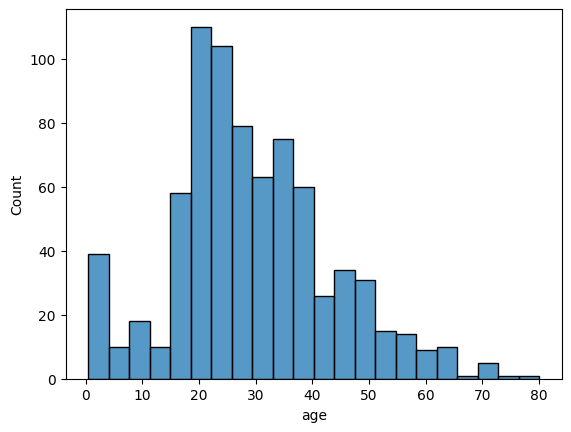

In [76]:
sns.histplot(data= titanic, x='age')

In [77]:
titanic['age_group'] = pd.cut(titanic['age'] ,
                             bins = [0,10,20,30,40,50,60,70,80] ,
                              labels=['0-10', '11-20','21-30', '31-40', '41-50', '51-60', '61-70', '71-80' ])

In [78]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,21-30
1,1,1,female,38.0,1,0,71.2833,C,First,31-40
2,1,3,female,26.0,0,0,7.9250,S,Third,21-30
3,1,1,female,35.0,1,0,53.1000,S,First,31-40
4,0,3,male,35.0,0,0,8.0500,S,Third,31-40


In [79]:
titanic['age_group'].value_counts()

,count
age_group,
21-30,282
31-40,172
11-20,109
41-50,84
0-10,63
51-60,42
61-70,16
71-80,5


<Axes: xlabel='age'>

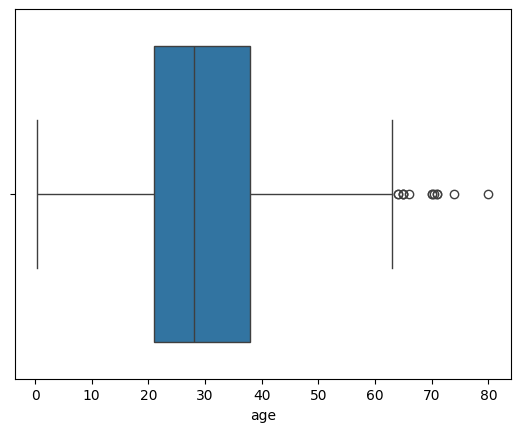

In [80]:
sns.boxplot(data= titanic, x='age')

In [81]:
age_survival = titanic.groupby('age_group')['survived'].mean()*100

/tmp/ipython-input-81-1889421761.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = titanic.groupby('age_group')['survived'].mean()*100


In [82]:
age_survival

,survived
age_group,
0-10,58.730159
11-20,40.366972
21-30,37.588652
31-40,46.511628
41-50,38.095238
51-60,40.476190
61-70,25.000000
71-80,20.000000


/tmp/ipython-input-83-523036477.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_survival.index , y = age_survival.values , palette='Set2')


<Axes: xlabel='age_group'>

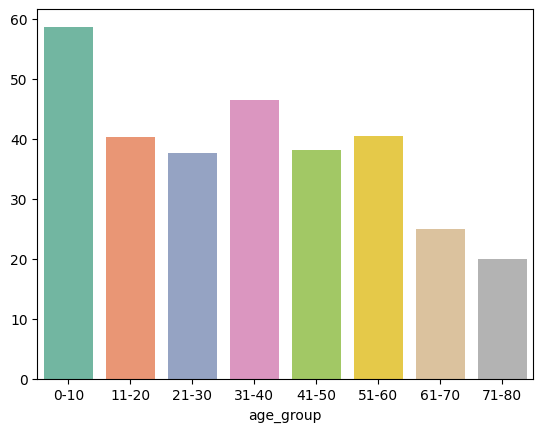

In [83]:
sns.barplot(x=age_survival.index , y = age_survival.values , palette='Set2')

In [84]:
#13 - correlation between fare , pclass and survived?

In [85]:
corr_matrix = titanic[['fare', 'pclass', 'survived']].corr()

In [86]:
corr_matrix

,fare,pclass,survived
fare,1.000000,-0.554939,0.244176
pclass,-0.554939,1.000000,-0.336633
survived,0.244176,-0.336633,1.000000


Text(0.5, 1.0, 'correlation of fare , pclass and survived')

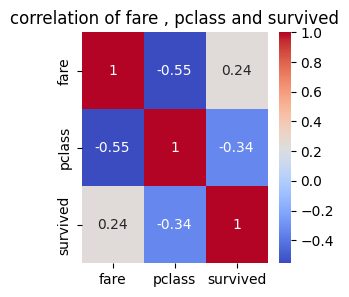

In [87]:
plt.figure(figsize = (3,3))
sns.heatmap(corr_matrix , annot = True , cmap= "coolwarm")
plt.title("correlation of fare , pclass and survived")

In [88]:
#14 - survivor - non survivor - age ranges

In [89]:
#continious feature - always try to draw box plot

/tmp/ipython-input-90-3805256269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= titanic , x='survived', y='age' , palette='Paired')


Text(0.5, 1.0, 'Age comparison of survival vs non survival')

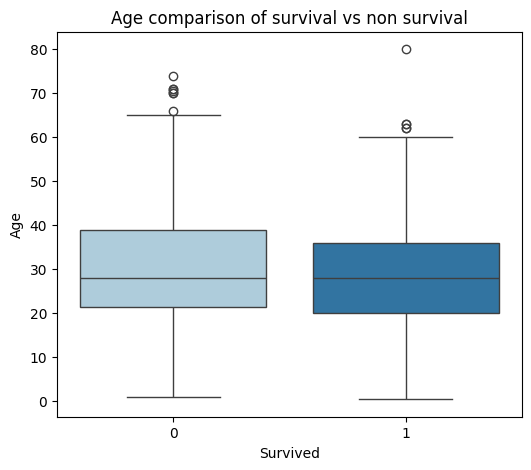

In [90]:
plt.figure(figsize = (6,5))
sns.boxplot(data= titanic , x='survived', y='age' , palette='Paired')
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Age comparison of survival vs non survival")

In [91]:
Q1 = titanic['age'].quantile(0.25)

In [92]:
Q2 = titanic['age'].quantile(0.50)

In [93]:
Q3 = titanic['age'].quantile(0.75)

In [94]:
IQR = Q3 - Q1

In [95]:
lower_bound = Q1 - 1.5 * IQR
upper_boud = Q3 + 1.5 * IQR

In [96]:
titanic_clean = titanic[(titanic['age'] > lower_bound) &
                        (titanic['age'] < upper_boud)]

<Axes: ylabel='age'>

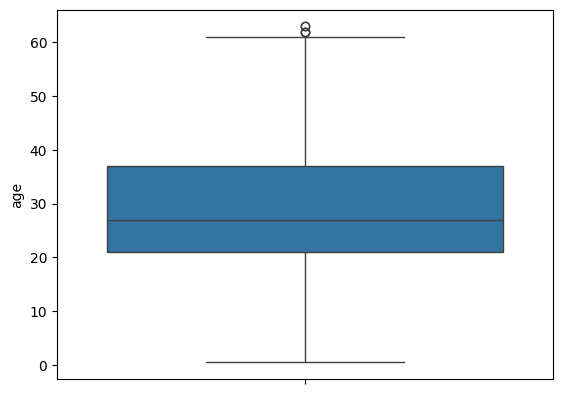

In [97]:
sns.boxplot(titanic_clean['age'])

/tmp/ipython-input-98-4040631874.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= titanic_clean , x='survived', y='age' , palette='Paired')


Text(0.5, 1.0, 'Age comparison of survival vs non survival')

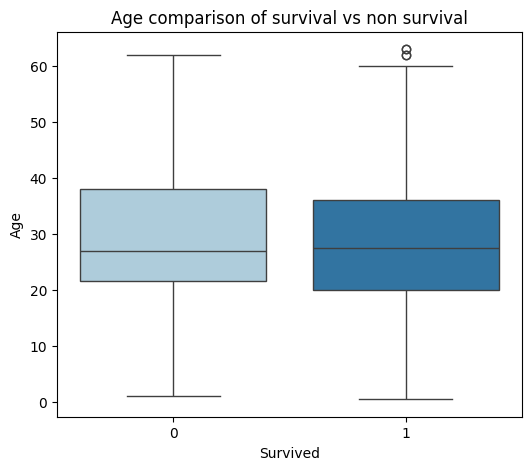

In [98]:
plt.figure(figsize = (6,5))
sns.boxplot(data= titanic_clean , x='survived', y='age' , palette='Paired')
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Age comparison of survival vs non survival")

In [99]:
upper_boud

np.float64(63.5)

In [100]:
#15 - Are younger passenger more likely to survived compare to old

In [101]:
titanic['age_group'].unique()

['21-30', '31-40', '51-60', '0-10', '11-20', '61-70', '41-50', '71-80']
Categories (8, object): ['0-10' < '11-20' < '21-30' < '31-40' < '41-50' < '51-60' < '61-70' < '71-80']

In [102]:
titanic.groupby('age_group')['survived'].mean()*100

/tmp/ipython-input-102-1416662335.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('age_group')['survived'].mean()*100


,survived
age_group,
0-10,58.730159
11-20,40.366972
21-30,37.588652
31-40,46.511628
41-50,38.095238
51-60,40.476190
61-70,25.000000
71-80,20.000000


In [103]:
#16 - survival rate for families passenger with sibsp or parch > 0 .

In [104]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,21-30
1,1,1,female,38.0,1,0,71.2833,C,First,31-40
2,1,3,female,26.0,0,0,7.9250,S,Third,21-30
3,1,1,female,35.0,1,0,53.1000,S,First,31-40
4,0,3,male,35.0,0,0,8.0500,S,Third,31-40


In [105]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

In [106]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,age_group,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,21-30,2
1,1,1,female,38.0,1,0,71.2833,C,First,31-40,2
2,1,3,female,26.0,0,0,7.9250,S,Third,21-30,1
3,1,1,female,35.0,1,0,53.1000,S,First,31-40,2
4,0,3,male,35.0,0,0,8.0500,S,Third,31-40,1


In [107]:
titanic['family'] = np.where(titanic['family_size'] > 1, "Family", "solo")

In [108]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,age_group,family_size,family
0,0,3,male,22.0,1,0,7.2500,S,Third,21-30,2,Family
1,1,1,female,38.0,1,0,71.2833,C,First,31-40,2,Family
2,1,3,female,26.0,0,0,7.9250,S,Third,21-30,1,solo
3,1,1,female,35.0,1,0,53.1000,S,First,31-40,2,Family
4,0,3,male,35.0,0,0,8.0500,S,Third,31-40,1,solo


In [109]:
family_surv_rate = titanic.groupby('family')['survived'].mean()*100

In [110]:
family_surv_rate

,survived
family,
Family,51.038576
solo,34.174312


<Axes: xlabel='family'>

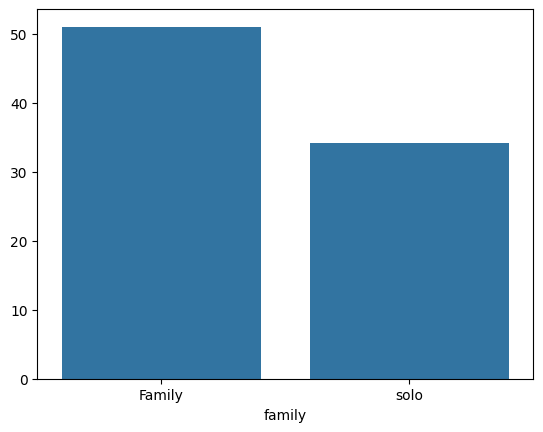

In [111]:
sns.barplot(x= family_surv_rate.index,
            y=family_surv_rate.values)

In [112]:
#17 - family size survival

In [113]:
titanic['family_size'].value_counts()

,count
family_size,
1,436
2,153
3,101
4,28
6,22
5,13
7,12
8,6
11,2


In [114]:
surv_family_size  = titanic.groupby('family_size')['survived'].mean()*100

In [115]:
surv_family_size

,survived
family_size,
1,34.174312
2,54.901961
3,57.425743
4,71.428571
5,23.076923
6,13.636364
7,33.333333
8,0.000000
11,0.000000


<Axes: xlabel='family_size'>

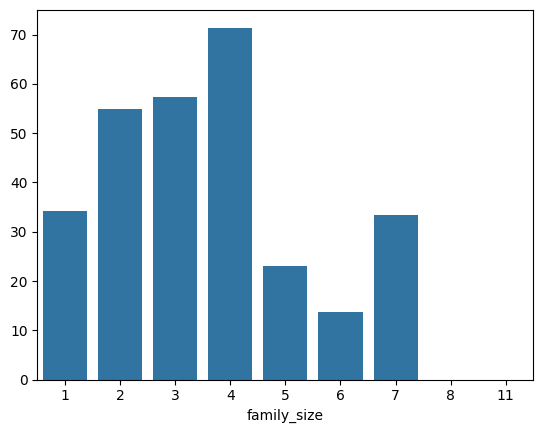

In [116]:
sns.barplot(x=surv_family_size.index ,
            y =surv_family_size.values)

In [117]:
#18- Survival differ for passenger with high fare.(OUTLIER)

<Axes: ylabel='fare'>

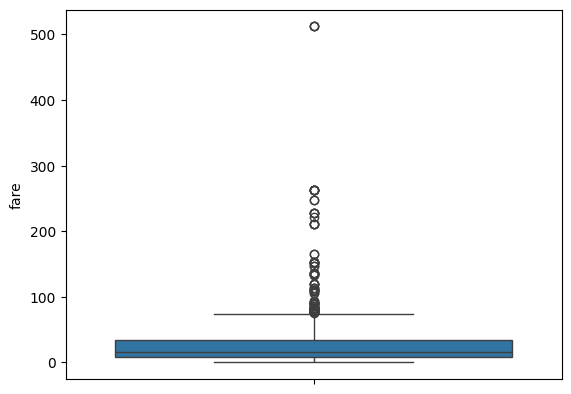

In [118]:
sns.boxplot(titanic['fare'])

In [119]:
titanic['fare'].describe()

,fare
count,773.000000
mean,35.003315
std,52.443053
min,0.000000
25%,8.050000
50%,16.100000
75%,34.375000
max,512.329200


In [120]:
Q1 = titanic['fare'].quantile(0.25)

In [121]:
Q2 = titanic['fare'].quantile(0.50)

In [122]:
Q3 = titanic['fare'].quantile(0.75)

In [123]:
IQR = Q3 - Q1

In [124]:
upper_bound = Q3 + 1.5 * IQR

In [125]:
upper_bound

np.float64(73.8625)

In [126]:
titanic['high_fare'] = np.where(titanic['fare'] > upper_bound, "Yes", "No")

In [127]:
titanic['high_fare'].value_counts()

,count
high_fare,
No,676
Yes,97


In [128]:
survial_rate = titanic.groupby('high_fare')['survived'].mean()*100

In [129]:
survial_rate

,survived
high_fare,
No,36.538462
Yes,76.288660


/tmp/ipython-input-130-2120929011.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survial_rate.index , y =survial_rate.values, palette='Set2')


<Axes: xlabel='high_fare'>

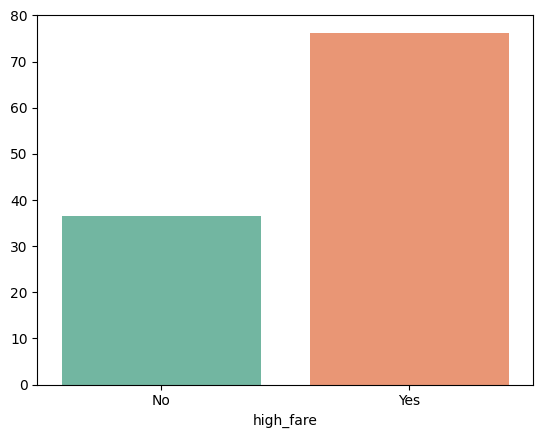

In [130]:
sns.barplot(x=survial_rate.index , y =survial_rate.values, palette='Set2')

In [131]:
#19 - gender based diff.- each passenger class

In [134]:
gender_surv = titanic.groupby(['pclass', 'sex'])['survived'].mean().unstack()*100

In [135]:
gender_surv

sex,female,male
pclass,,
1,96.739130,38.461538
2,91.666667,18.478261
3,47.244094,16.117216


<Axes: xlabel='pclass', ylabel='survived'>

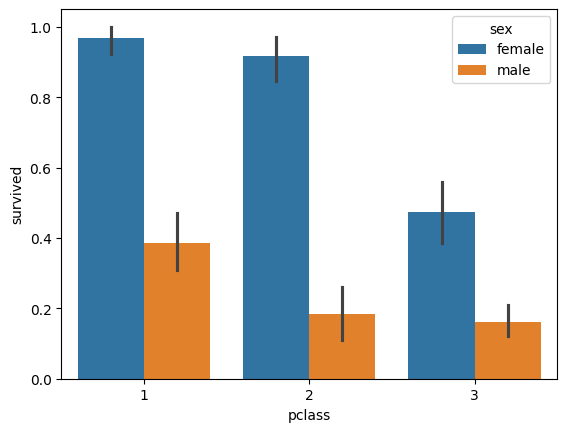

In [136]:
sns.barplot(data = titanic, x='pclass', y='survived', hue='sex')

In [137]:
#20 - embarked from port - within pclass

In [139]:
embarked_surv = titanic.groupby(['pclass', 'embarked'])['survived'].mean().unstack()*100

In [138]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'age_group', 'family_size', 'family', 'high_fare'],
      dtype='object')

In [140]:
embarked_surv

embarked,C,Q,S
pclass,,,
1,70.731707,50.000000,60.000000
2,52.941176,66.666667,50.000000
3,42.592593,32.075472,21.843003


<Axes: xlabel='pclass', ylabel='survived'>

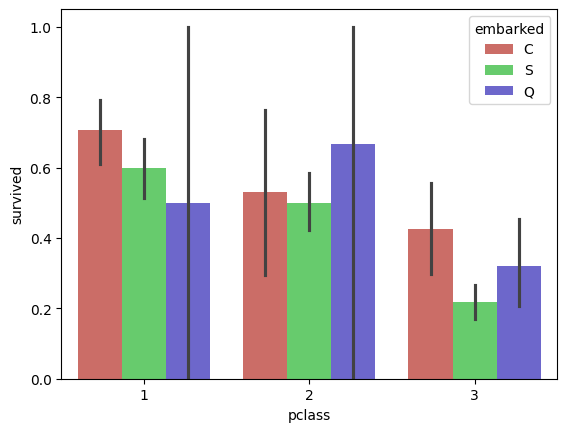

In [141]:
sns.barplot(data=titanic, x='pclass', y='survived', hue='embarked', palette='hls')

In [142]:
#21- correlation - numerical

In [143]:
corr_matrix = titanic.corr(numeric_only=True)

In [144]:
corr_matrix

,survived,pclass,age,sibsp,parch,fare,family_size
survived,1.000000,-0.336633,-0.074413,-0.041987,0.067514,0.244176,0.009960
pclass,-0.336633,1.000000,-0.397498,0.088753,0.038709,-0.554939,0.079076
age,-0.074413,-0.397498,1.000000,-0.289343,-0.189057,0.114124,-0.292488
sibsp,-0.041987,0.088753,-0.289343,1.000000,0.379745,0.132237,0.859834
parch,0.067514,0.038709,-0.189057,0.379745,1.000000,0.189811,0.798845
fare,0.244176,-0.554939,0.114124,0.132237,0.189811,1.000000,0.190746
family_size,0.009960,0.079076,-0.292488,0.859834,0.798845,0.190746,1.000000


<Axes: >

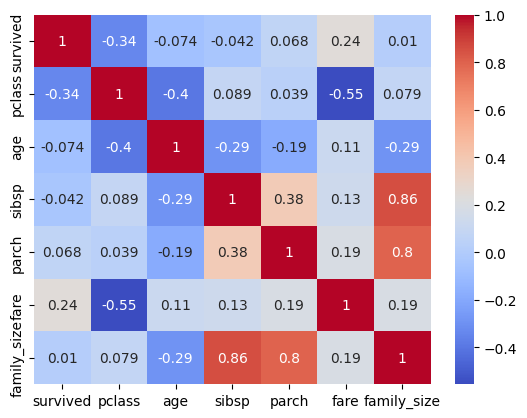

In [146]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [147]:
#violin plot -

<Axes: xlabel='survived', ylabel='fare'>

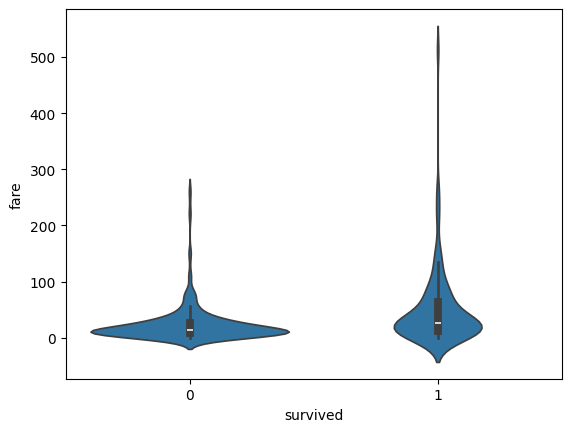

In [148]:
sns.violinplot(data= titanic, x='survived', y='fare')

In [149]:
#23- smarmplot

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 76.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 87.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='pclass', ylabel='survived'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 81.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


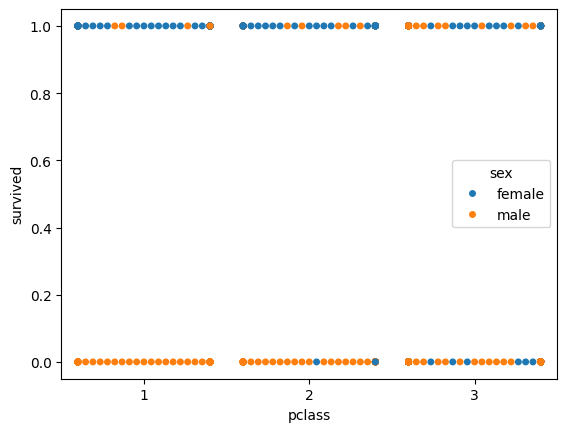

In [150]:
sns.swarmplot(data=titanic, x='pclass', y='survived', hue='sex')

In [151]:
#24- box-fare for embarked

<Axes: xlabel='embarked', ylabel='fare'>

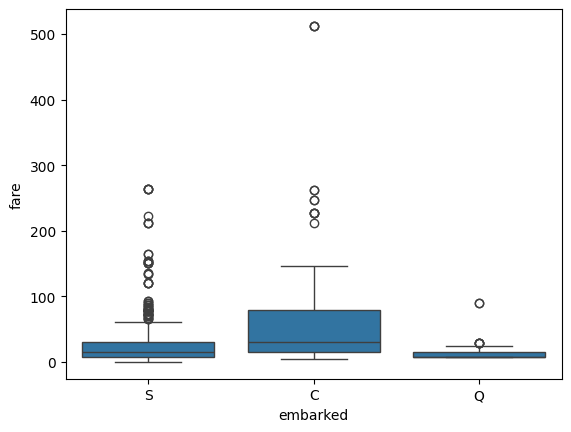

In [152]:
sns.boxplot(data=titanic, x='embarked', y='fare' )

In [153]:
#25- pairplot - age, fare, pclass, survived

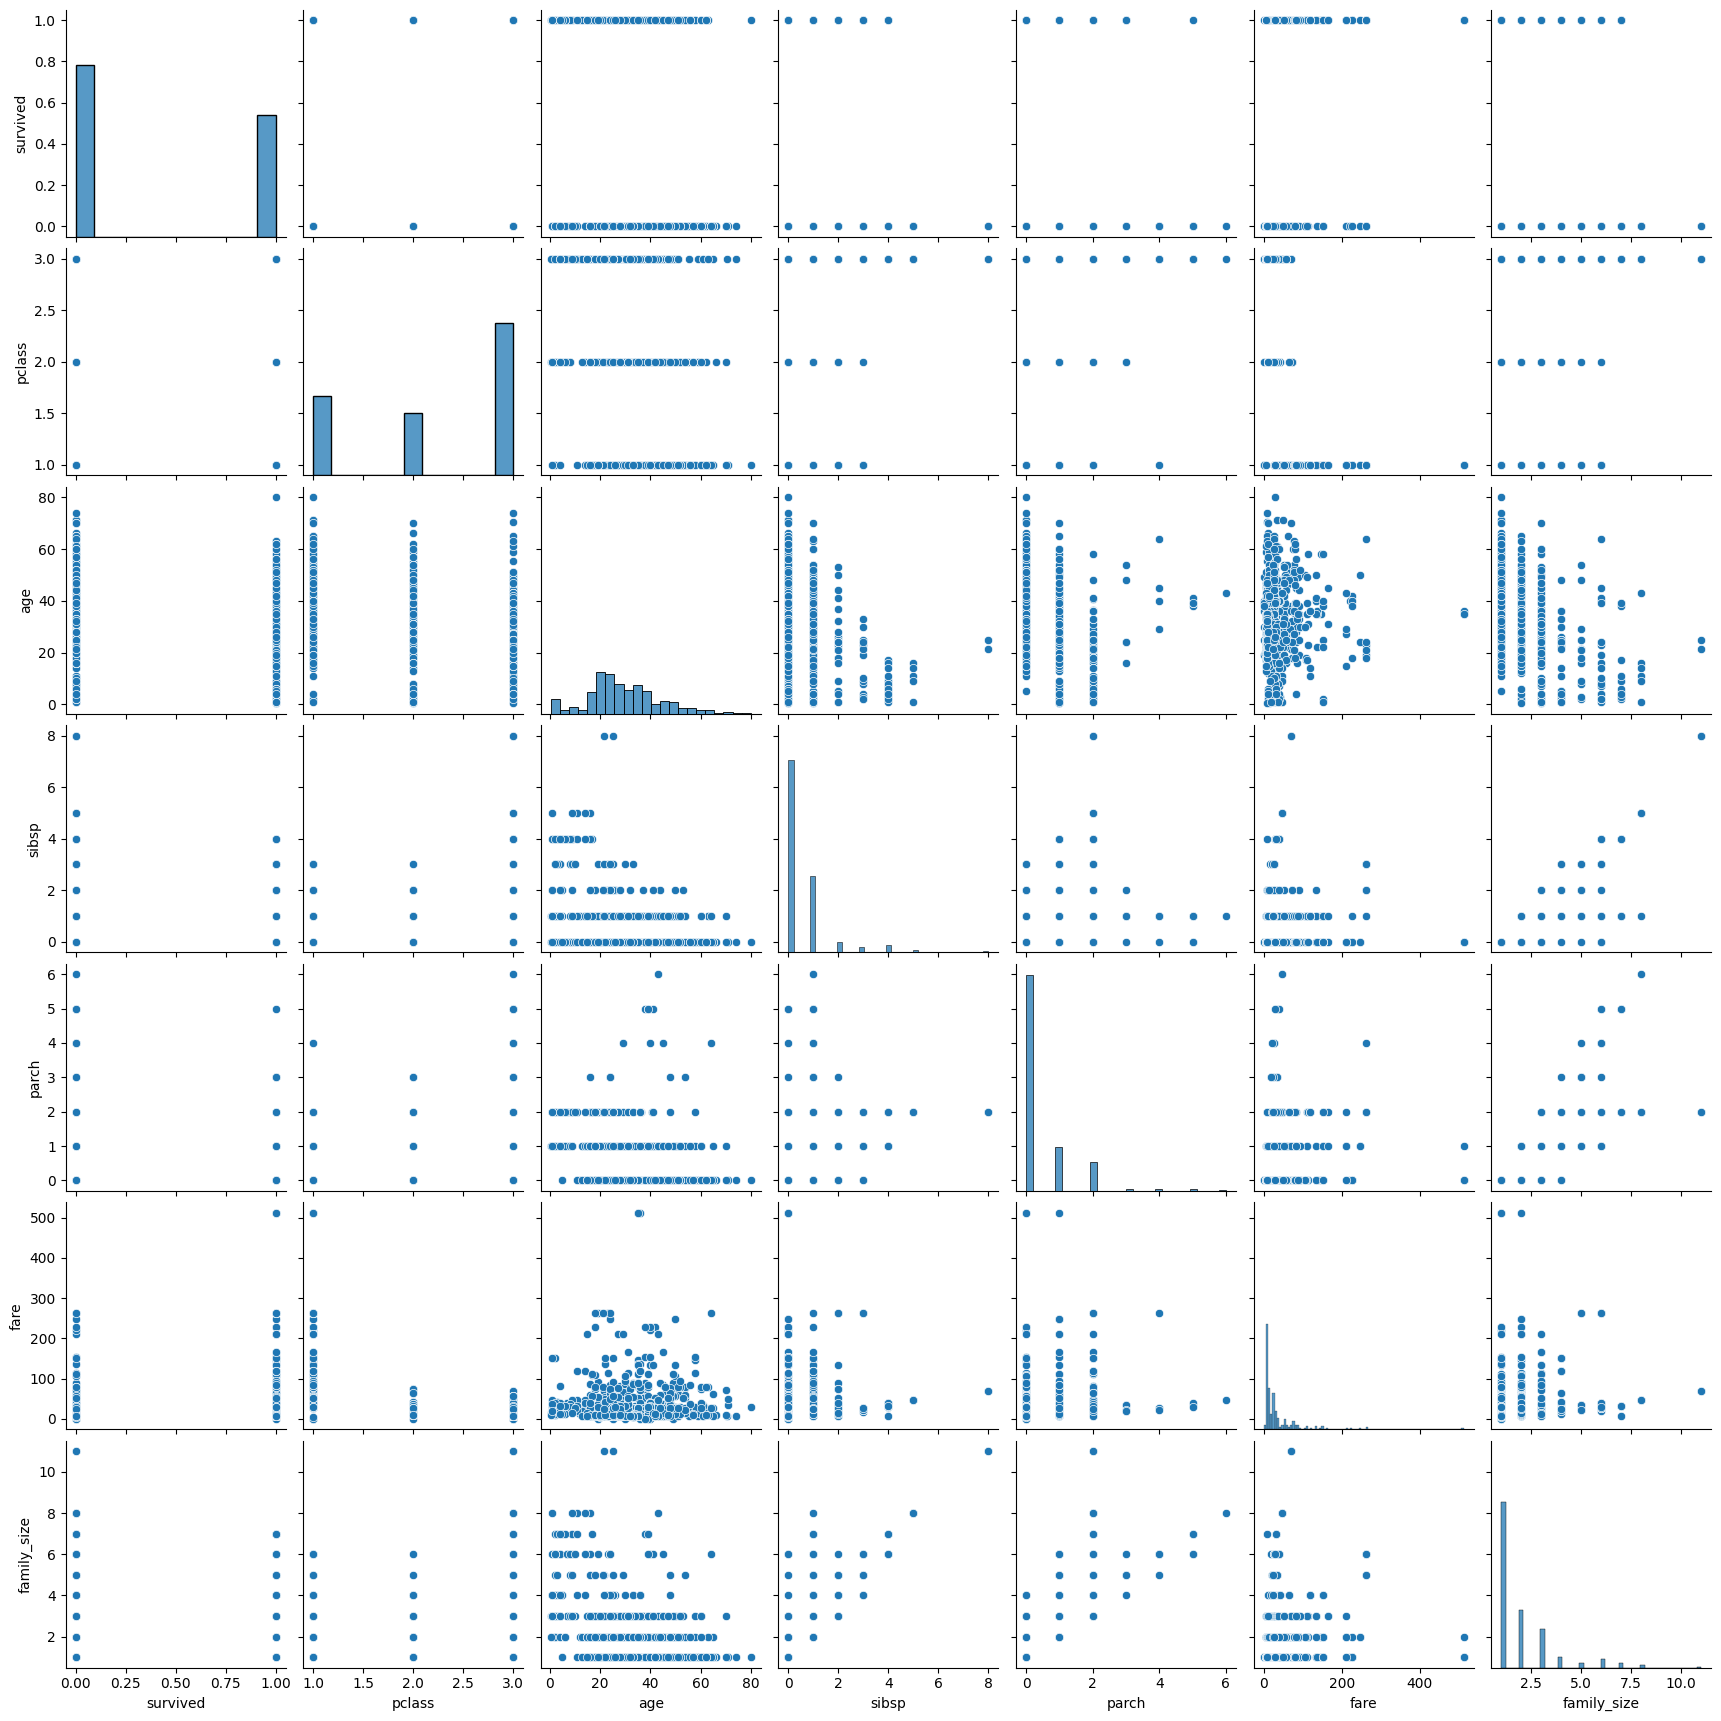

In [154]:
sns.pairplot(titanic)

In [155]:
data = titanic[['age', 'fare', 'pclass', 'survived']]

In [156]:
data.head(2)

,age,fare,pclass,survived
0,22.0,7.2500,3,0
1,38.0,71.2833,1,1


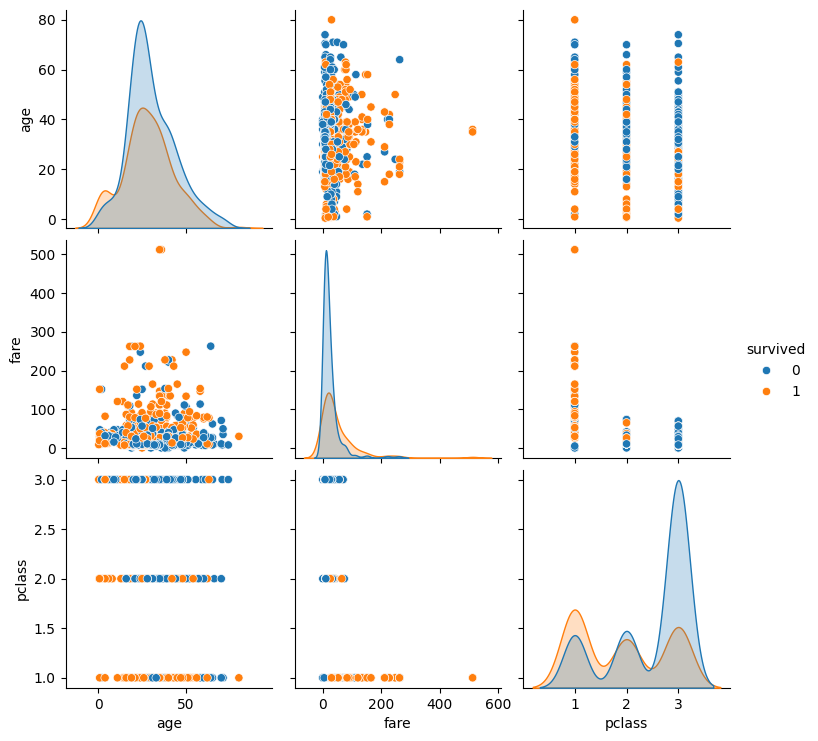

In [157]:
sns.pairplot(data, hue='survived')

In [158]:
#trends - age, gender, pclass

In [159]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'age_group', 'family_size', 'family', 'high_fare'],
      dtype='object')

<Axes: xlabel='age_group', ylabel='survived'>

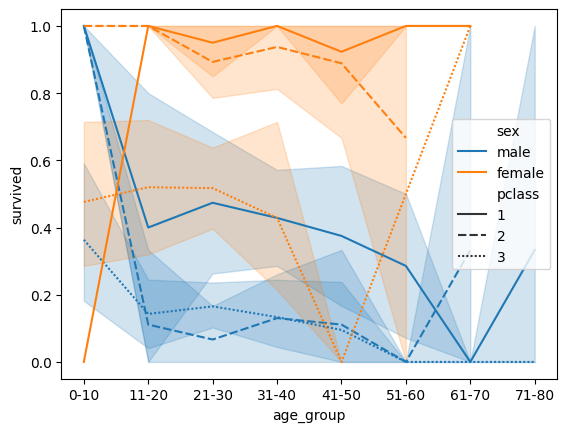

In [160]:
sns.lineplot(data=titanic, x='age_group', y='survived', hue='sex', style='pclass')